## Clustering on ToN IoT Dataset

### Data Preprocessing

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df = pd.read_csv("/content/drive/MyDrive/ML Lab/LAB_ToN_IoT.csv")
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
0,1909167,176.28.50.165-192.168.1.32-80-49056-6,176.28.50.165,80,192.168.1.32,49056,6,27/04/2019 04:47:51 pm,801869,5,...,0.0,0.0,0.0,0.0,1.556348e+15,0.0,1.556348e+15,1.556348e+15,0,Benign
1,5064909,52.28.231.150-192.168.1.35-80-58548-6,52.28.231.150,80,192.168.1.35,58548,6,27/04/2019 10:37:54 pm,182,1,...,0.0,0.0,0.0,0.0,1.556369e+15,0.0,1.556369e+15,1.556369e+15,0,Benign
2,589938,192.168.1.193-192.168.1.33-445-33721-6,192.168.1.193,445,192.168.1.33,33721,6,28/04/2019 02:57:14 pm,313,2,...,0.0,0.0,0.0,0.0,1.556427e+15,0.0,1.556427e+15,1.556427e+15,0,Benign
3,1126246,52.28.231.150-192.168.1.36-80-34034-6,52.28.231.150,80,192.168.1.36,34034,6,27/04/2019 03:51:29 pm,386,1,...,0.0,0.0,0.0,0.0,1.556344e+15,0.0,1.556344e+15,1.556344e+15,0,Benign
4,1827801,192.168.1.190-192.168.1.36-80-41390-6,192.168.1.190,80,192.168.1.36,41390,6,27/04/2019 04:39:33 pm,24199,4,...,0.0,0.0,0.0,0.0,1.556347e+15,0.0,1.556347e+15,1.556347e+15,0,Benign


In [32]:
df.shape

(133794, 86)

In [33]:
df.columns

Index(['Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port',
       'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag

In [34]:
columns_to_remove = ["Unnamed: 0","Flow ID","Src IP","Src Port","Dst IP","Dst Port","Timestamp"]
df = df.drop(columns=columns_to_remove)

In [35]:
print(df.columns)
df.shape

Index(['Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd

(133794, 79)

In [36]:
df.dtypes.value_counts()

,count
float64,45
int64,33
object,1


In [37]:
df.select_dtypes(include=['object']).columns

Index(['Attack'], dtype='object')

In [38]:
df.isnull().sum().sort_values(ascending=False)

,0
Protocol,0
Flow Duration,0
Tot Fwd Pkts,0
Tot Bwd Pkts,0
TotLen Fwd Pkts,0
...,...
Idle Std,0
Idle Max,0
Idle Min,0
Label,0


In [39]:
df.dropna(inplace=True)
df.shape

(133794, 79)

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = pd.get_dummies(df,columns=["Protocol"],drop_first=True)
df_encoded["Attack"] = le.fit_transform(df_encoded["Attack"])
df_encoded["Label"] = le.fit_transform(df_encoded["Label"])

In [41]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

### Clustering Attack and Benign

In [42]:
X = df.drop(columns=["Label","Attack"])
y = df["Label"]


In [43]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Label', 'Attack'])
y = df['Label']

# Stratified sampling
X_small, _, y_small, _ = train_test_split(
    X, y, train_size=10000, stratify=y, random_state=42
)

print(X_small.shape, y_small.shape)


(10000, 77) (10000,)


#### K-Means Clustering

In [44]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=2,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=1010)

y_km = km.fit_predict(X_small)

In [45]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 32925464515327350580829701013504.00


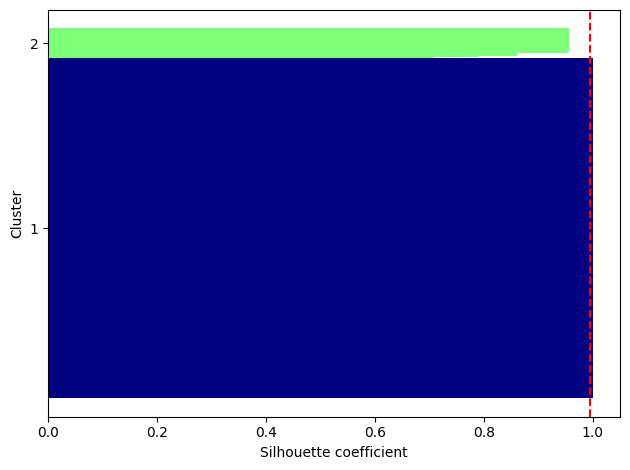

In [46]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_small, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('figures/10_04.png', dpi=300)
plt.show()

In [47]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

labels = np.zeros_like(y_km)
for i in range(2):
    mask = (y_km == i)
    labels[mask] = mode(y_small[mask], keepdims=True)[0]

acc = accuracy_score(y_small, labels)
print("Cluster Accuracy:", acc)


Cluster Accuracy: 0.5825


#### Heirarchial Clustering

In [68]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from scipy.stats import mode

In [69]:
metric="euclidean"

In [70]:
def plot_simple_dendrogram(X, method='ward', metric='euclidean', truncate_mode='level', p=5):
    Z = linkage(X, method=method, metric=metric)
    plt.figure(figsize=(12, 6))
    dendrogram(Z, truncate_mode=truncate_mode, p=p)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Data points")
    plt.ylabel("Distance")
    plt.show()

In [71]:
def plot_dendrogram_heatmap(X, method='ward', metric='euclidean'):
    X_scaled = StandardScaler().fit_transform(X)
    df_scaled = pd.DataFrame(X_scaled, index=X.index if isinstance(X, pd.DataFrame) else range(len(X)))
    row_clusters = linkage(df_scaled, method=method, metric=metric)

    fig = plt.figure(figsize=(10, 8), facecolor='white')
    axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
    row_dendr = dendrogram(row_clusters, orientation='left', no_labels=True)
    df_rowclust = df_scaled.iloc[row_dendr['leaves'][::-1]]
    axd.set_xticks([])
    axd.set_yticks([])
    for spine in axd.spines.values():
        spine.set_visible(False)

    axm = fig.add_axes([0.3, 0.1, 0.6, 0.6])
    cax = axm.matshow(df_rowclust, aspect='auto', interpolation='nearest', cmap='hot_r')
    fig.colorbar(cax)
    axm.set_xticks(range(len(df_rowclust.columns)))
    axm.set_xticklabels(df_rowclust.columns, rotation=90, fontsize=6)
    axm.set_yticks([])
    plt.show()

In [72]:
def agglomerative_clustering_analysis(X, y, n_clusters=2, linkage='ward', metric='euclidean'):
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
    y_pred = agg.fit_predict(X)
    labels = np.zeros_like(y_pred)
    for i in np.unique(y_pred):
        mask = (y_pred == i)
        labels[mask] = mode(y[mask], keepdims=True)[0]
    acc = accuracy_score(y, labels)
    print(f"Agglomerative Clustering Accuracy ({linkage} linkage):", acc)
    return y_pred, labels, acc


- Linkage : ward

In [73]:
method="ward"

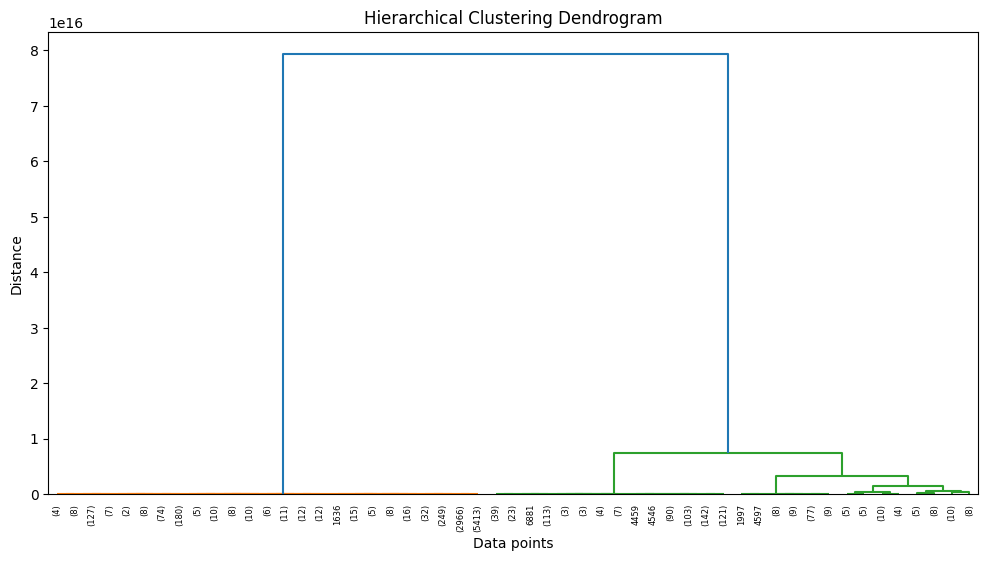

In [74]:
plot_simple_dendrogram(X_small, method, metric, truncate_mode='level', p=5)

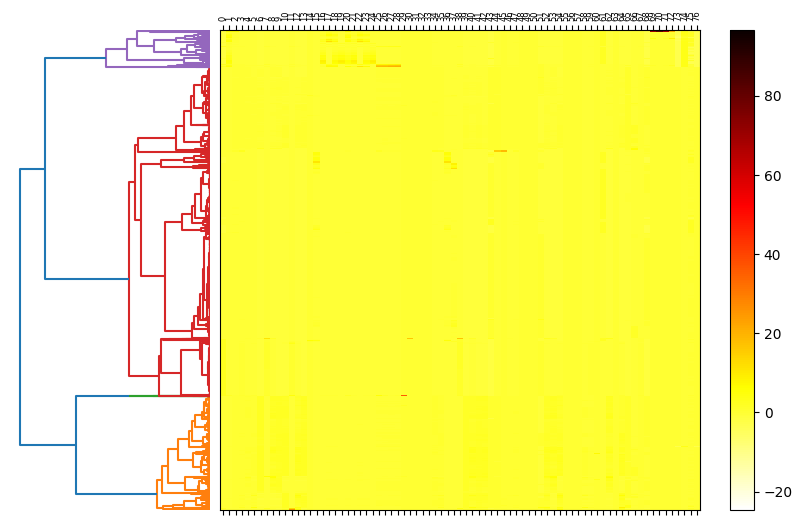

In [75]:
plot_dendrogram_heatmap(X_small,method,metric)

In [77]:
y_pred, labels, acc = agglomerative_clustering_analysis(X_small, y_small, n_clusters=2, linkage=method)

Agglomerative Clustering Accuracy (ward linkage): 0.5825


- Linkage : complete

In [78]:
method="complete"

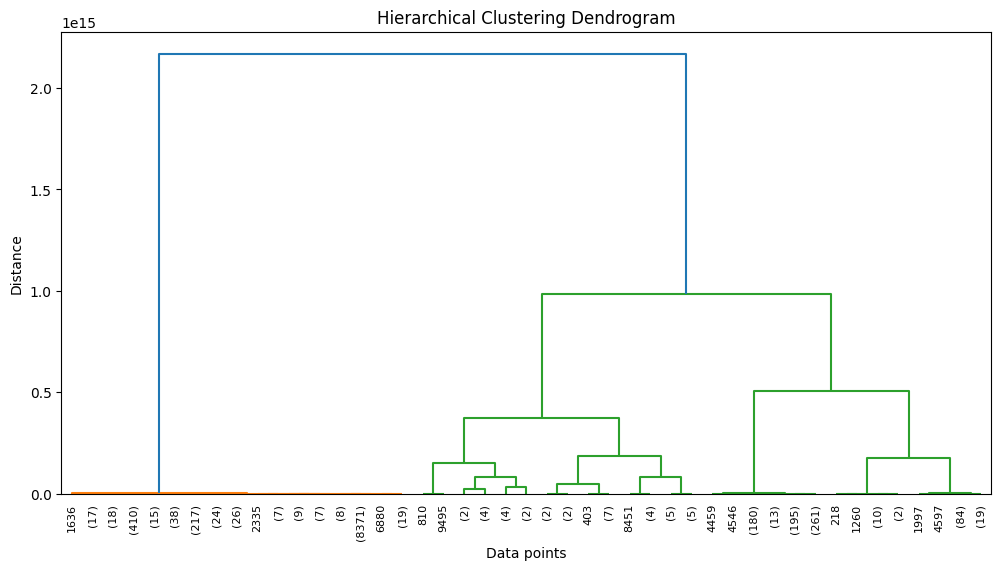

In [79]:
plot_simple_dendrogram(X_small, method, metric, truncate_mode='level', p=5)

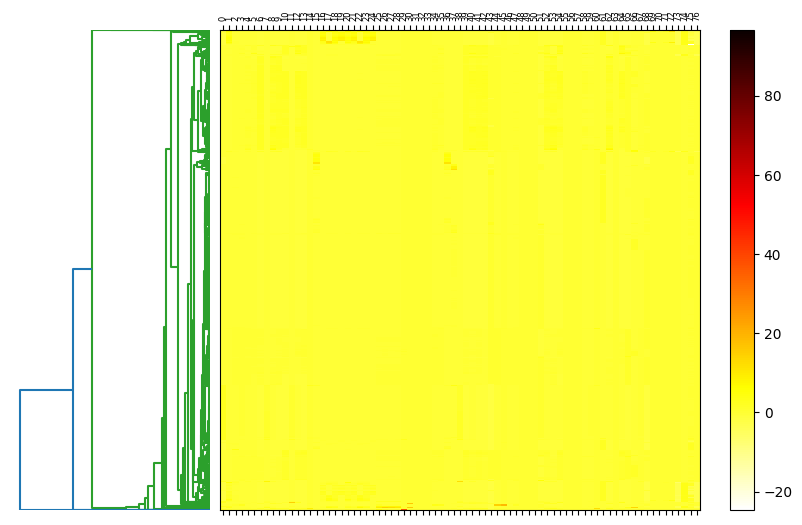

In [80]:
plot_dendrogram_heatmap(X_small,method,metric)

In [81]:
y_pred, labels, acc = agglomerative_clustering_analysis(X_small, y_small, n_clusters=2, linkage=method)

Agglomerative Clustering Accuracy (complete linkage): 0.5825


- Linkage : average

In [82]:
method="average"

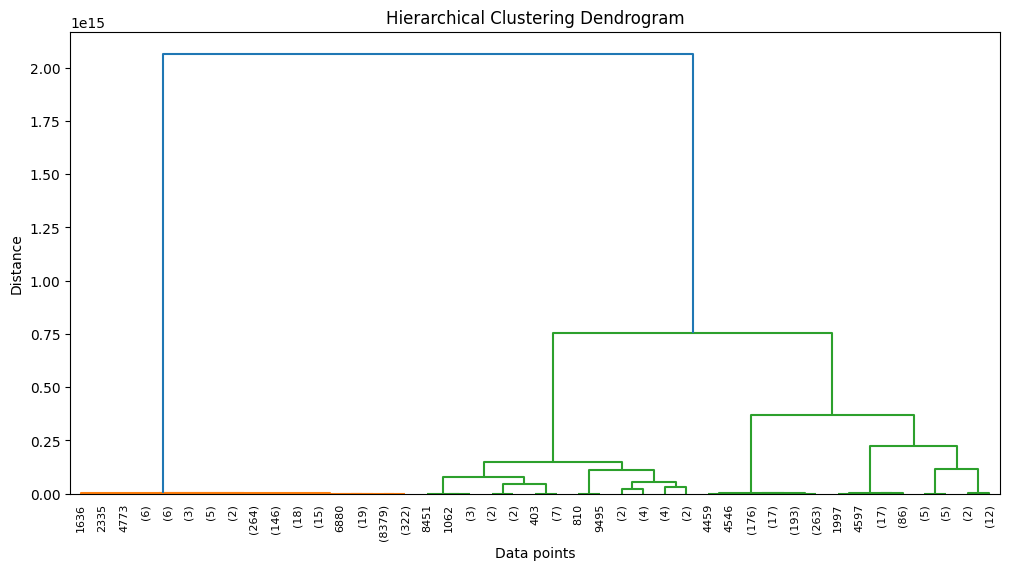

In [83]:
plot_simple_dendrogram(X_small, method, metric, truncate_mode='level', p=5)

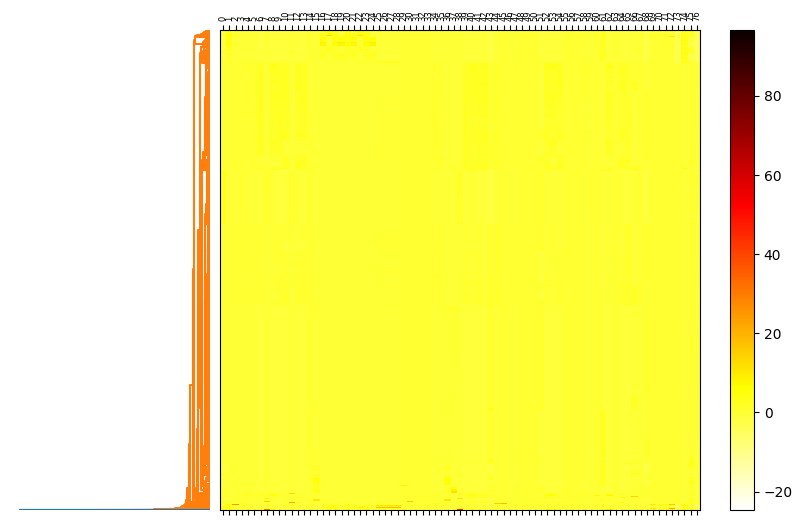

In [84]:
plot_dendrogram_heatmap(X_small,method,metric)

In [85]:
y_pred, labels, acc = agglomerative_clustering_analysis(X_small, y_small, n_clusters=2, linkage=method)

Agglomerative Clustering Accuracy (average linkage): 0.5825


- Linkage : Single

In [86]:
method="single"

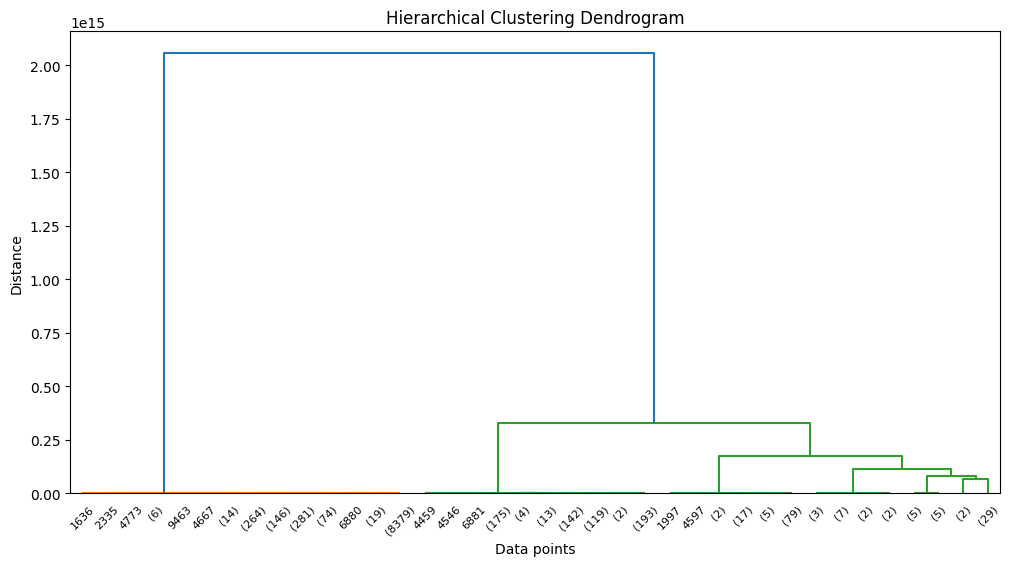

In [87]:
plot_simple_dendrogram(X_small, method, metric, truncate_mode='level', p=5)

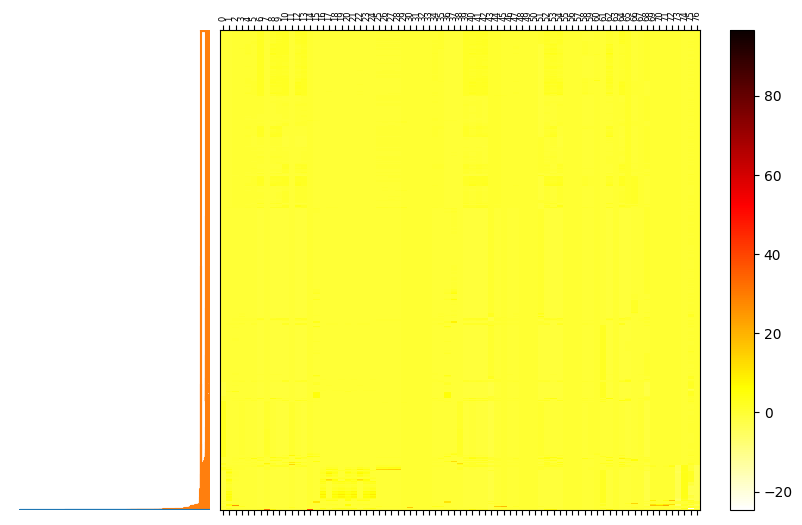

In [88]:
plot_dendrogram_heatmap(X_small,method,metric)

In [89]:
y_pred, labels, acc = agglomerative_clustering_analysis(X_small, y_small, n_clusters=2, linkage=method)

Agglomerative Clustering Accuracy (single linkage): 0.5825


#### DB Scan Clusetering

In [92]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import mode

def run_dbscan_with_accuracy(X, y, eps=0.5, min_samples=5):
    X_scaled = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    y_db = db.fit_predict(X_scaled)

    labels = np.zeros_like(y_db)
    for i in set(y_db):
        if i == -1:
            continue
        mask = (y_db == i)
        labels[mask] = mode(y[mask], keepdims=True)[0]

    acc = accuracy_score(y, labels)
    return acc, y_db

In [91]:
acc, y_db = run_dbscan_with_accuracy(X_small, y_small, eps=0.5, min_samples=5)
print("DBSCAN Accuracy:", acc)

DBSCAN Accuracy: 0.8886


### Multi Class Classification

In [95]:
df = df[df['Label'] == 1]
df.shape

(70913, 79)

In [97]:
df['Attack'].unique()

array(['backdoor', 'ddos', 'dos', 'injection', 'mitm', 'password',
       'ransomware', 'scanning', 'xss'], dtype=object)

In [98]:
X = df.drop(columns=['Label', 'Attack'])  # keep only numeric features
y = df['Attack']

In [99]:
n_samples = 10000
n_classes = y.nunique()
per_class = n_samples // n_classes

In [100]:
X_small, _, y_small, _ = train_test_split(
    X, y,
    train_size=per_class * n_classes,
    stratify=y,
    random_state=42
)

In [101]:
n_clusters = y_small.nunique()

### K - Means Clustering

In [102]:
km = KMeans(
    n_clusters=n_clusters,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=1010
)
y_km = km.fit_predict(X_small)

In [103]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 529472110531295066456064.00


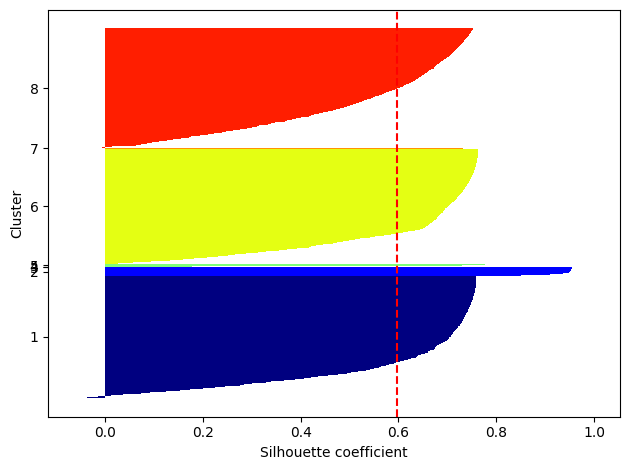

In [104]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_small, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('figures/10_04.png', dpi=300)
plt.show()

In [107]:
from sklearn.metrics import accuracy_score
import numpy as np

labels = np.empty_like(y_small, dtype=object)

for i in np.unique(y_km):
    mask = (y_km == i)
    vals, counts = np.unique(y_small[mask], return_counts=True)
    labels[mask] = vals[np.argmax(counts)]

acc = accuracy_score(y_small, labels)
print("Cluster Accuracy:", acc)


Cluster Accuracy: 0.7658765876587659


### Heirarchial Clustering

In [112]:
def agglomerative_clustering_analysis(X, y, n_clusters=2, linkage_method='ward'):
    if linkage_method == 'ward':
        agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    else:
        agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric='euclidean')

    y_pred = agg.fit_predict(X)
    labels = np.empty_like(y_pred, dtype=object)

    for i in np.unique(y_pred):
        mask = (y_pred == i)
        vals, counts = np.unique(y[mask], return_counts=True)
        labels[mask] = vals[np.argmax(counts)]

    acc = accuracy_score(y, labels)
    print(f"Agglomerative Clustering Accuracy ({linkage_method} linkage):", acc)
    return y_pred, labels, acc

- Linkage : ward

In [113]:
method="ward"

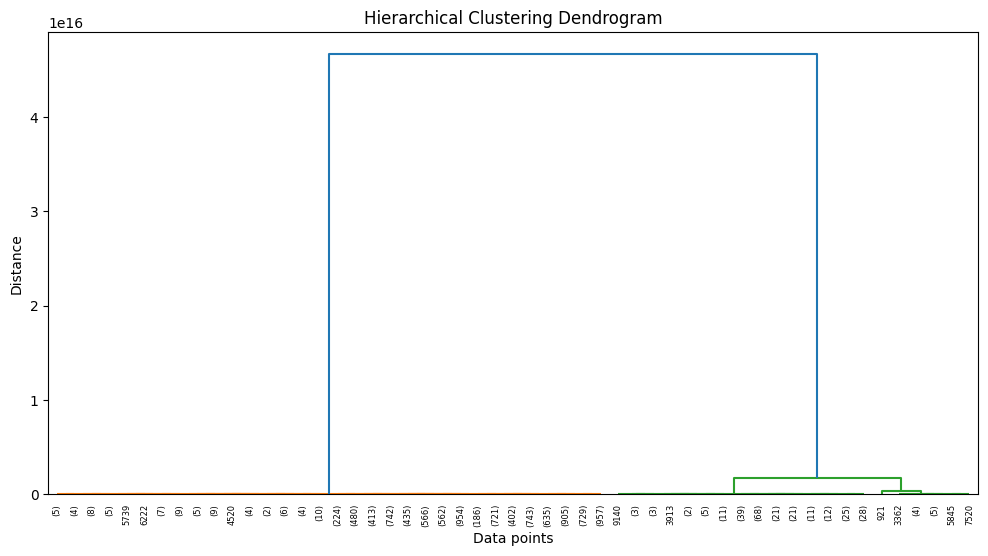

In [114]:
plot_simple_dendrogram(X_small, method, metric, truncate_mode='level', p=5)

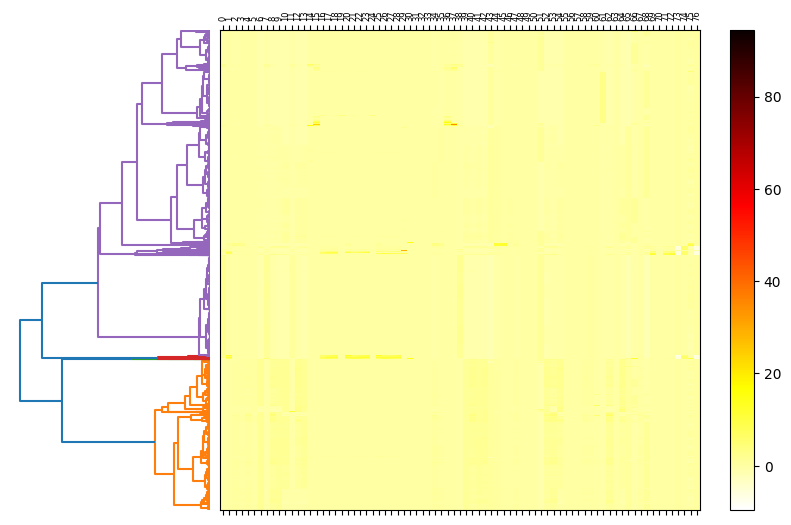

In [115]:
plot_dendrogram_heatmap(X_small,method,metric)

In [128]:
y_pred, labels, acc = agglomerative_clustering_analysis(X_small, y_small, n_clusters, linkage_method=method)

Agglomerative Clustering Accuracy (single linkage): 0.7660766076607661


- Linkage : complete

In [ ]:
method="complete"

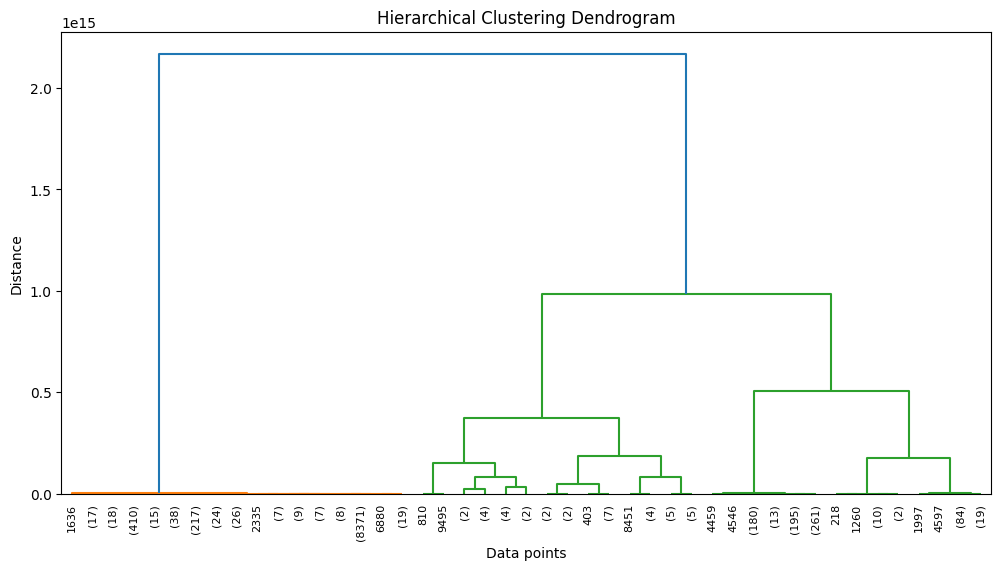

In [ ]:
plot_simple_dendrogram(X_small, method, metric, truncate_mode='level', p=5)

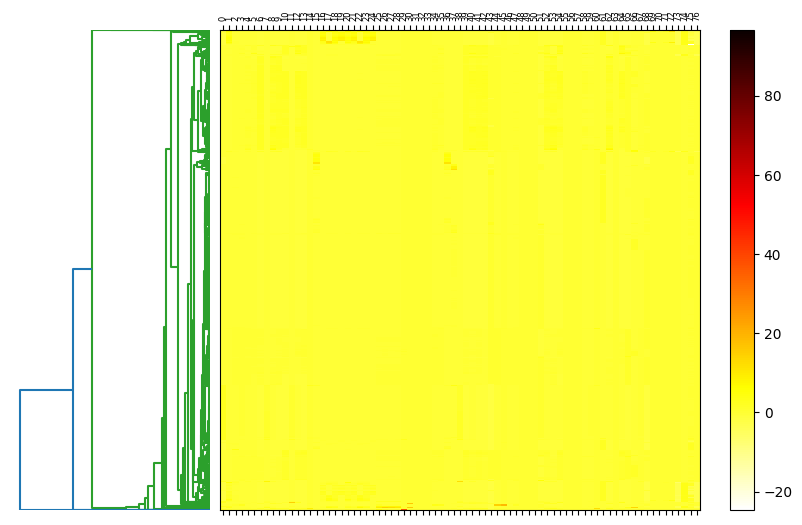

In [ ]:
plot_dendrogram_heatmap(X_small,method,metric)

In [118]:
y_pred, labels, acc = agglomerative_clustering_analysis(X_small, y_small, n_clusters=2, linkage_method=method)

Agglomerative Clustering Accuracy (ward linkage): 0.7566756675667566


- Linkage : average

In [119]:
method="average"

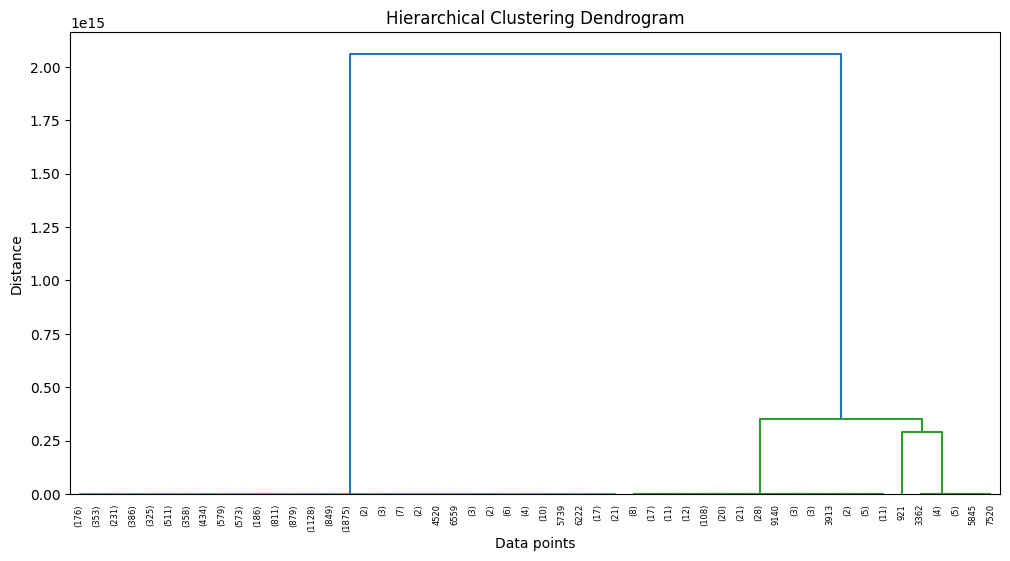

In [120]:
plot_simple_dendrogram(X_small, method, metric, truncate_mode='level', p=5)

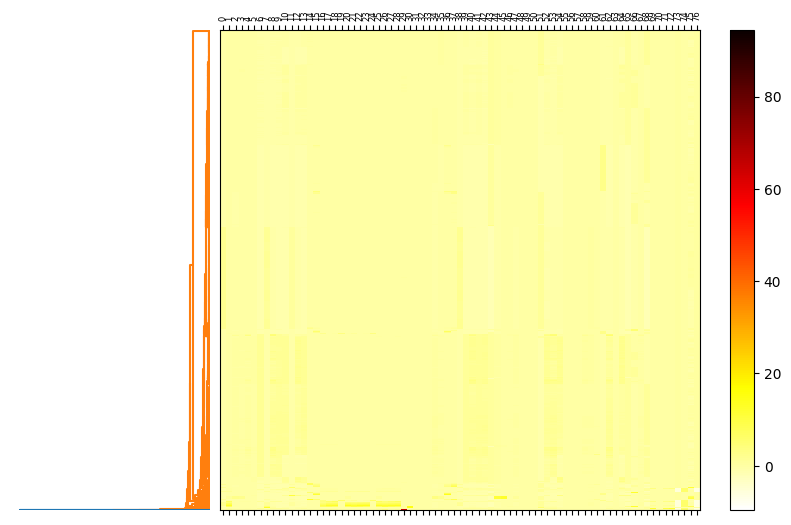

In [121]:
plot_dendrogram_heatmap(X_small,method,metric)

In [122]:
y_pred, labels, acc = agglomerative_clustering_analysis(X_small, y_small, n_clusters=2, linkage_method=method)

Agglomerative Clustering Accuracy (average linkage): 0.7566756675667566


- Linkage : Single

In [123]:
method="single"

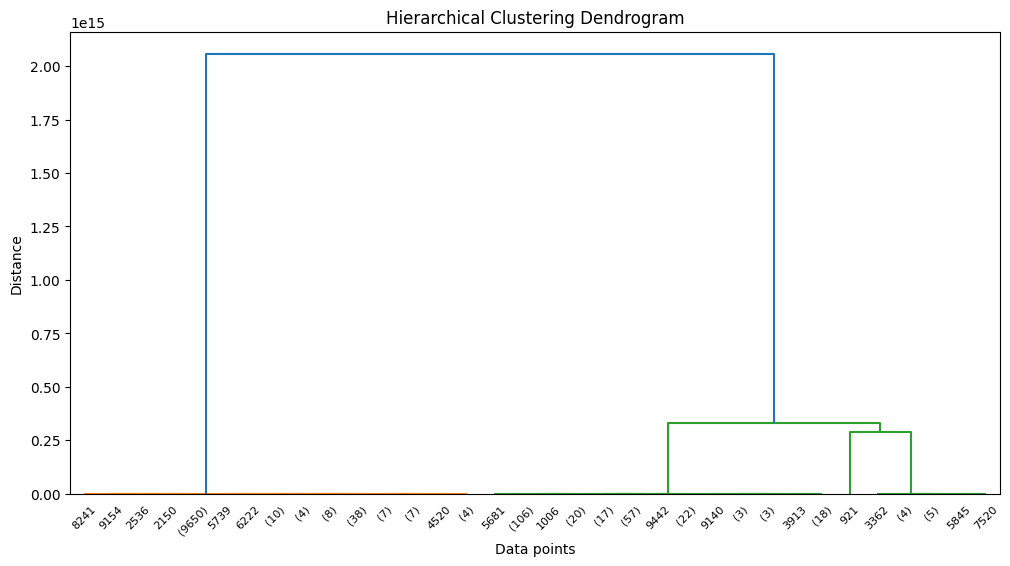

In [124]:
plot_simple_dendrogram(X_small, method, metric, truncate_mode='level', p=5)

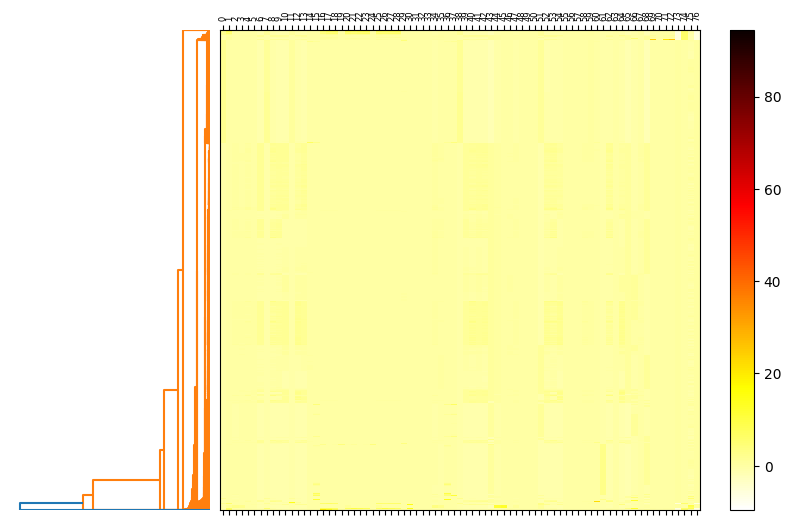

In [125]:
plot_dendrogram_heatmap(X_small,method,metric)

In [126]:
y_pred, labels, acc = agglomerative_clustering_analysis(X_small, y_small, n_clusters=2, linkage_method=method)

Agglomerative Clustering Accuracy (single linkage): 0.7566756675667566


### DBSCAN Clustering

In [132]:
def run_dbscan_with_accuracy(X, y, eps=0.5, min_samples=5):
    X_scaled = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    y_db = db.fit_predict(X_scaled)

    labels = np.empty_like(y_db, dtype=object)

    for cluster_id in np.unique(y_db):
        if cluster_id == -1:  # skip noise points
            continue
        mask = (y_db == cluster_id)
        vals, counts = np.unique(y[mask], return_counts=True)
        majority_label = vals[np.argmax(counts)]
        labels[mask] = majority_label
    labels[y_db == -1] = "noise"

    acc = accuracy_score(y, labels)
    return acc, y_db


In [133]:
acc, y_db = run_dbscan_with_accuracy(X_small, y_small, eps=0.5, min_samples=5)
print("DBSCAN Accuracy:", acc)

DBSCAN Accuracy: 0.6811681168116812


## Summary

### Clustering Attack and Benign (Binary Classification)

 - K-Means Clustering: Achieved an accuracy of 0.5825. The silhouette plot indicates that the clusters are not well-separated, which is reflected in the moderate accuracy.
 - Hierarchical Clustering:
    - Ward Linkage: Achieved an accuracy of 0.5825.
    - Complete Linkage: Achieved an accuracy of 0.5825.
    - Average Linkage: Achieved an accuracy of 0.5825.
    - Single Linkage: Achieved an accuracy of 0.5825.
    The dendrograms show some clustering structure, but the accuracies for all linkage methods are similar and moderate.
 - DBSCAN Clustering: Achieved an accuracy of 0.8886. This method performed significantly better than K-Means and Hierarchical Clustering for this binary classification task, suggesting it was more effective at identifying the clusters in this dataset for the 'Label' column.

### Multi Class Classification (Attack Type)

 - K-Means Clustering: Achieved an accuracy of 0.7659. The silhouette plot shows some variation in silhouette coefficients across clusters, indicating varying degrees of separation.
 - Hierarchical Clustering:
    - Ward Linkage: Achieved an accuracy of 0.7661.
    - Complete Linkage: Achieved an accuracy of 0.7567.
    - Average Linkage: Achieved an accuracy of 0.7567.
    - Single Linkage: Achieved an accuracy of 0.7567.  
Similar to the binary case, the hierarchical clustering methods show comparable accuracies, which are better than random chance but not as high as the binary classification with DBSCAN.
 - DBSCAN Clustering: Achieved an accuracy of 0.6812. For the multi-class classification, DBSCAN's performance is lower compared to K-Means and Hierarchical Clustering with the 'ward' linkage. This could be due to the density-based nature of DBSCAN and the distribution of data points across the different attack types.